# Reporting summary:
- Dependent variables
 - Taking the log difference of Bitcoin prices and making it binary
- Independent variables
 - Applying forward fill
imputation method
 - Taking the log difference
 - Standardizing the scale differences


# Import the libraries and data

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 205)
pd.options.display.float_format = '{:.4f}'.format
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

path = "..\data"

# Import the user-defined modules
import sys
sys.path.append(path+'\..\src')
import preprocess_ts, conduct_eda
from preprocess_ts import *
from conduct_eda import *

In [2]:
blockchain = pd.read_pickle(path+"/01_raw/blockchain.pickle")
dv = pd.DataFrame(blockchain["btc_price"])
blockchain = blockchain.drop(dv.columns, axis=1)
macro = pd.read_pickle(path+"/01_raw/macro.pickle")
crypto = pd.read_pickle(path+"/01_raw/crypto.pickle")

# Dependent Variables

## btc_price

### Change the variable name

In [3]:
dv = dv.rename({"btc_price": "BTC_Price"}, axis=1)

### Check the data

In [4]:
check_data(dv)

(1292, 1)
            BTC_Price
Date                 
2017-09-05  4202.9100
2017-09-06  4385.0200
2017-09-07  4612.1200
            BTC_Price
Date                 
2021-03-17 56872.3800
2021-03-18 58913.0000
2021-03-19 57665.9000
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1292 entries, 2017-09-05 to 2021-03-19
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_Price  1292 non-null   float64
dtypes: float64(1)
memory usage: 20.2 KB
None


### Missing values

BTC_Price    0
dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


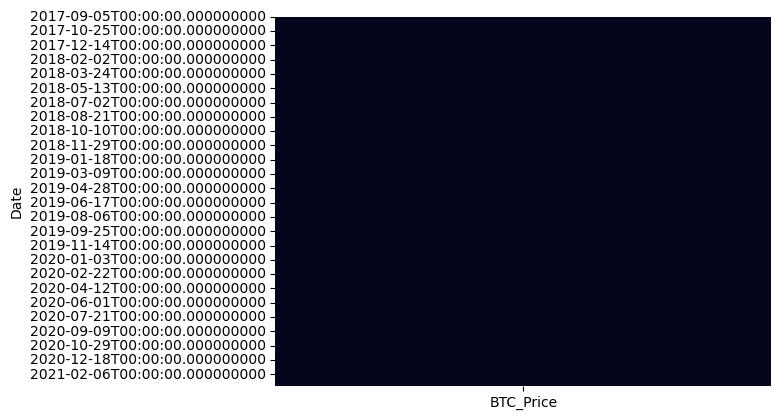

In [5]:
check_missing_values(dv)

### Plot a variable

<AxesSubplot:xlabel='Date'>

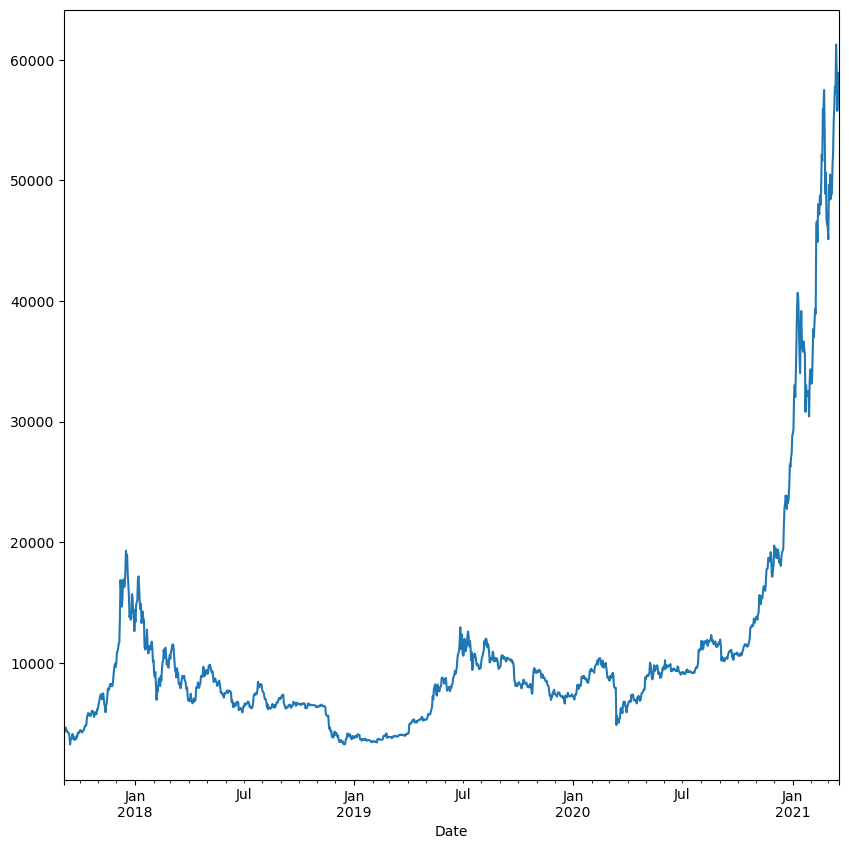

In [6]:
dv.plot(legend=False, figsize=(10,10))

### Features Selection and Engineering

#### Take Log Return

In [7]:
# Generate btc_log, btc_LogReturn and btc_LogReturn_binary BTC_Price
dv["BTC_Price_LogReturn"] = np.log1p(dv["BTC_Price"]).diff()
dv["BTC_Price_LogReturn_binary"] = (dv["BTC_Price_LogReturn"] > 0).astype(int)

BTC_Price                     0
BTC_Price_LogReturn           1
BTC_Price_LogReturn_binary    0
dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


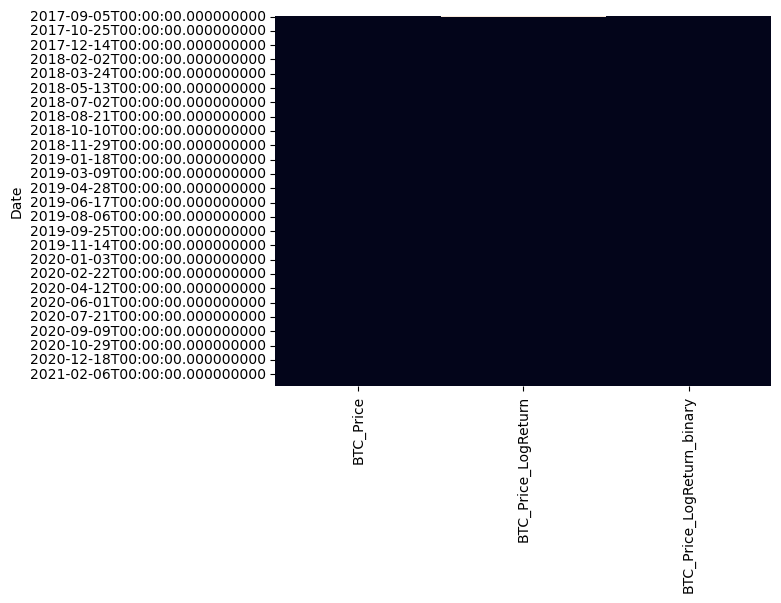

In [8]:
check_missing_values(dv)

#### Treat Missing Values

In [9]:
dv_preprocessed = impute_missing_values(dv, method="fillna_ffill", replace_inf=False)

# Drop the first row
dv_preprocessed = dv_preprocessed.dropna()

The number of -np.inf 0
The number of np.inf 0
Before imputation:  1
After imputation:  0


# Independent Variables

## blockchain

### Check the data

In [10]:
check_data(blockchain)

(1292, 31)
            total-bitcoins       market-cap   trade-volume  blocks-size  \
Date                                                                      
2017-09-05   16545093.7500 71617958245.0000 452591245.9611  132285.8682   
2017-09-06   16547818.7500 75355913404.3083 513071150.6586  132436.2914   
2017-09-07   16549850.0000 75343192125.0000 401234377.2780  132582.7635   

            avg-block-size  n-transactions-per-block  n-transactions-total  \
Date                                                                         
2017-09-05          0.7636                 1410.9036        251961553.0000   
2017-09-06          0.9041                 1705.0926        252239647.0000   
2017-09-07          0.8100                 1456.6705        252515787.0000   

            median-confirmation-time  avg-confirmation-time    hash-rate  ...  \
Date                                                                      ...   
2017-09-05                    8.8250                14.9665 

### Missing values

total-bitcoins                      2
market-cap                          2
trade-volume                        0
blocks-size                         1
avg-block-size                      1
n-transactions-per-block            1
n-transactions-total                1
median-confirmation-time            1
avg-confirmation-time               1
hash-rate                           1
difficulty                          1
miners-revenue                      1
transaction-fees                    1
transaction-fees-usd                1
fees-usd-per-transaction            2
cost-per-transaction-percent        1
cost-per-transaction                1
n-unique-addresses                  4
n-transactions                      1
transactions-per-second             0
output-volume                       1
mempool-count                       0
mempool-growth                      0
mempool-size                        0
utxo-count                          1
n-transactions-excluding-popular    1
estimated-tr

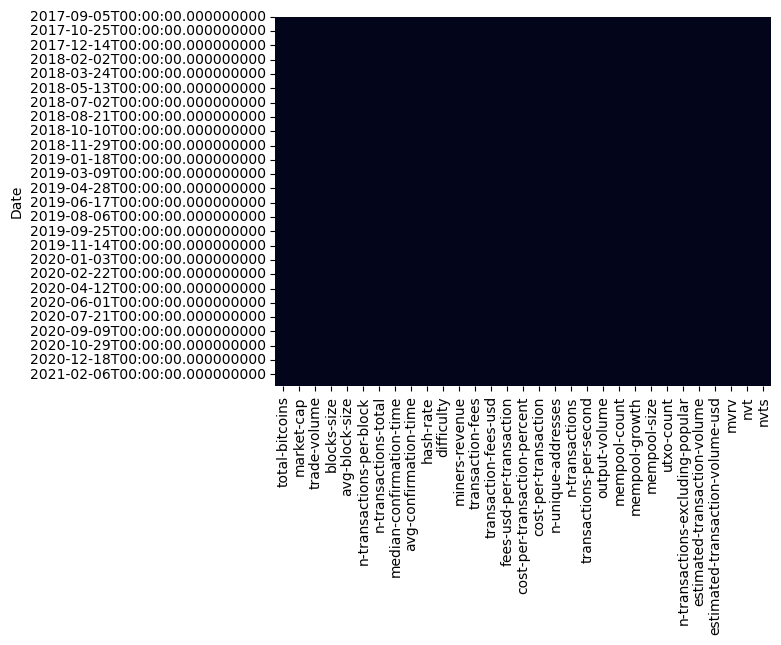

In [11]:
check_missing_values(blockchain)

In [12]:
# Impute missing values
blockchain = impute_missing_values(blockchain)

The number of -np.inf 0
The number of np.inf 0
Before imputation:  35
After imputation:  0


### Plot all variables

<AxesSubplot:xlabel='Date'>

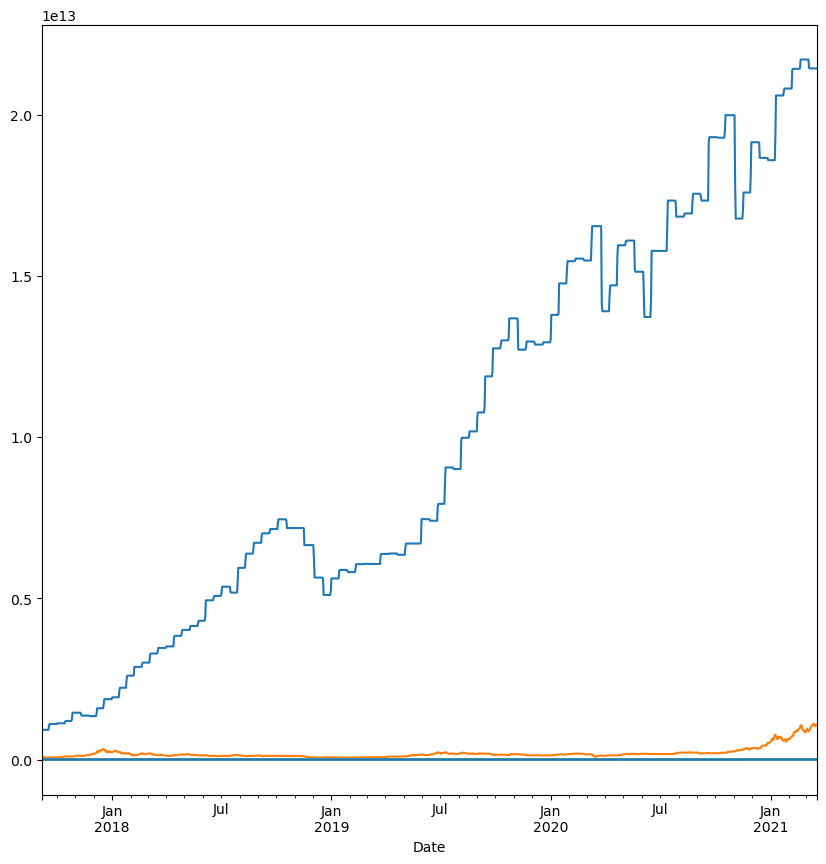

In [13]:
blockchain.plot(legend=False, figsize=(10,10))

### Features Selection and Engineering

#### Delete the similar variables to reduce the number of independent variables

In [14]:
blockchain.columns

Index(['total-bitcoins', 'market-cap', 'trade-volume', 'blocks-size',
       'avg-block-size', 'n-transactions-per-block', 'n-transactions-total',
       'median-confirmation-time', 'avg-confirmation-time', 'hash-rate',
       'difficulty', 'miners-revenue', 'transaction-fees',
       'transaction-fees-usd', 'fees-usd-per-transaction',
       'cost-per-transaction-percent', 'cost-per-transaction',
       'n-unique-addresses', 'n-transactions', 'transactions-per-second',
       'output-volume', 'mempool-count', 'mempool-growth', 'mempool-size',
       'utxo-count', 'n-transactions-excluding-popular',
       'estimated-transaction-volume', 'estimated-transaction-volume-usd',
       'mvrv', 'nvt', 'nvts'],
      dtype='object')

In [15]:
blockchain = blockchain.drop(['transaction-fees-usd',  'fees-usd-per-transaction', 'cost-per-transaction-percent', 'estimated-transaction-volume-usd', 'nvt'], axis=1)

#### Take Log Return

In [16]:
# Take log return of blockchain variables
blockchain_preprocessed = take_log_return(blockchain, drop_original=False)

#### Treat Missing Values

In [17]:
# Revisit dropping missing values
# Impute missing values
blockchain_preprocessed = impute_missing_values(blockchain_preprocessed, method="fillna_ffill")

The number of -np.inf 0
The number of np.inf 0
Before imputation:  26
After imputation:  0


#### Take Difference 


In [18]:
test_adf(blockchain_preprocessed.filter(like="LogReturn")).query("p_value >= 0.05")

,test statistic,p_value
variables,,
total-bitcoins_LogReturn,-1.4329,0.5664
blocks-size_LogReturn,-1.8392,0.3612
n-transactions-total_LogReturn,-1.7128,0.4245


In order to make all the variables stationary, take diff of:
["total-bitcoins_LogReturn", "blocks-size_LogReturn", "n-transactions-total_LogReturn"]

In [19]:
blockchain_preprocessed[["total-bitcoins_diff_LogReturn",  "blocks-size_diff_LogReturn", "n-transactions-total_diff_LogReturn"]] = blockchain_preprocessed[["total-bitcoins_LogReturn", "blocks-size_LogReturn", "n-transactions-total_LogReturn"]].diff().dropna()

#### Treat Missing Values again

In [20]:
# Revisit dropping missing values
# Impute missing values
blockchain_preprocessed = impute_missing_values(blockchain_preprocessed, method="fillna_ffill")

The number of -np.inf 0
The number of np.inf 0
Before imputation:  3
After imputation:  0


## macro

### Change the variable names

In [21]:
macro = change_varnames_price_volume(macro)

### Check the data

In [22]:
check_data(macro)

(1292, 28)
              sp500_Volume  sp500_Price  eurostoxx_Volume  eurostoxx_Price  \
Date                                                                         
2017-09-05 3490260000.0000    2457.8501     27881800.0000        3420.8601   
2017-09-06 3374410000.0000    2465.5400     40628800.0000        3433.8000   
2017-09-07 3353930000.0000    2465.1001     36453300.0000        3447.6599   

             dow30_Volume  dow30_Price   nasdaq_Volume  nasdaq_Price  \
Date                                                                   
2017-09-05 332840000.0000   21753.3105 1886950000.0000     6375.5698   
2017-09-06 318760000.0000   21807.6406 1906030000.0000     6393.3101   
2017-09-07 333810000.0000   21784.7793 1998380000.0000     6397.8701   

            oil_Volume  oil_Price  ...  gbp_usd_Volume  gbp_usd_Price  \
Date                               ...                                  
2017-09-05 742808.0000    48.6600  ...          0.0000         1.3041   
2017-09-06 788963.

### Missing values

sp500_Volume        401
sp500_Price         401
eurostoxx_Volume    405
eurostoxx_Price     405
dow30_Volume        401
dow30_Price         401
nasdaq_Volume       401
nasdaq_Price        401
oil_Volume          410
oil_Price           410
SSE_Volume          435
SSE_Price           435
gold_Volume         411
gold_Price          411
vix_Volume          401
vix_Price           401
nikkei225_Volume    430
nikkei225_Price     430
gbp_usd_Volume      391
gbp_usd_Price       391
jpy_usd_Volume      391
jpy_usd_Price       391
chf_usd_Volume      391
chf_usd_Price       391
cny_usd_Volume      392
cny_usd_Price       392
eur_usd_Volume      391
eur_usd_Price       391
dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


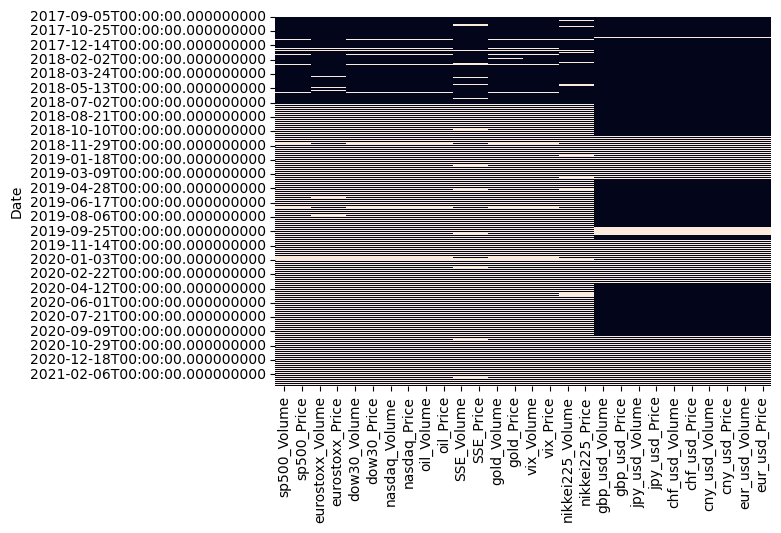

In [23]:
check_missing_values(macro)

In [24]:
# Impute missing values
macro = impute_missing_values(macro, method="fillna_ffill")
# Drop all 0 columns
macro = drop_zero_cols(macro)

The number of -np.inf 0
The number of np.inf 0
Before imputation:  11302
After imputation:  0


### Plot all variables

<AxesSubplot:xlabel='Date'>

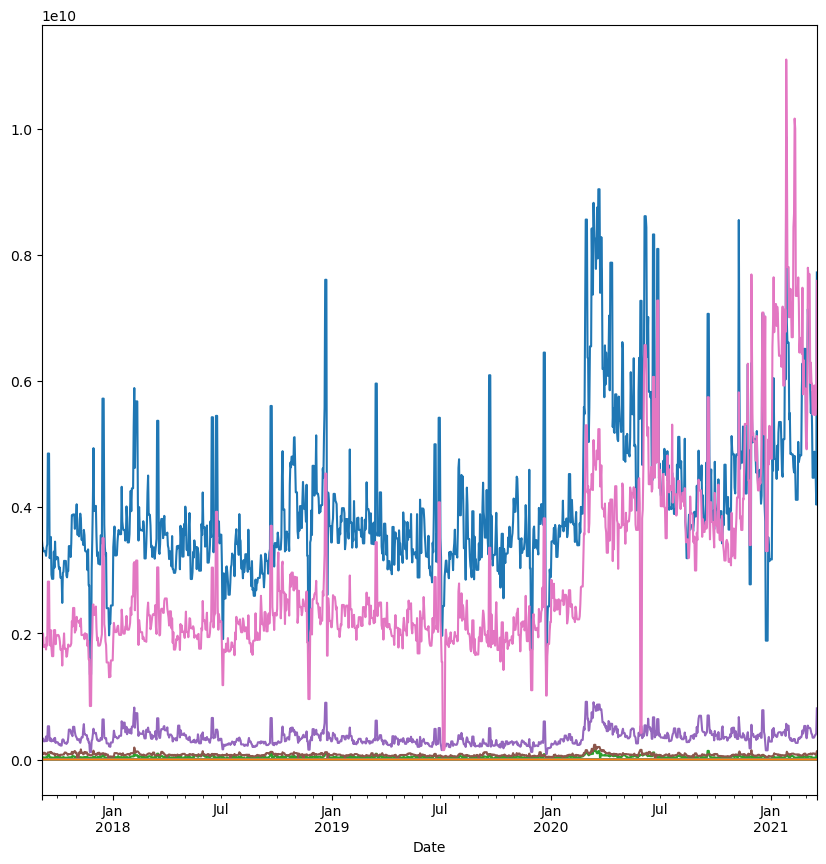

In [25]:
macro.plot(legend=False, figsize=(10,10))

### Features Selection and Engineering


In [26]:
macro.columns

Index(['sp500_Volume', 'sp500_Price', 'eurostoxx_Volume', 'eurostoxx_Price',
       'dow30_Volume', 'dow30_Price', 'nasdaq_Volume', 'nasdaq_Price',
       'oil_Volume', 'oil_Price', 'SSE_Volume', 'SSE_Price', 'gold_Volume',
       'gold_Price', 'vix_Price', 'nikkei225_Volume', 'nikkei225_Price',
       'gbp_usd_Price', 'jpy_usd_Price', 'chf_usd_Price', 'cny_usd_Price',
       'eur_usd_Price'],
      dtype='object')

#### Take Log Return

In [27]:
# Create a function to take log or log return of variables
def take_log_return_macro(macro, drop_original=True):
    """
    Take log return of macroeconomic variables.
    If drop_original=True, original time series will be dropped from the output dataframe.

    Params:
        macro: pd.DataFrame
        drop_original: boolean
    
    Return:
        macro_preprocessed: pd.DataFrame (Variables were taken log or log return of)
    """
    
    # macro_Volume
    macro_volume_LogReturn = take_log_return(macro.filter(like="Volume"), drop_original=False)
    # macro_Price
    macro_prices_LogReturn = take_log_return(macro.filter(like="Price"), drop_original=False)
    # Merge the above
    macro_preprocessed = pd.merge(macro_volume_LogReturn, macro_prices_LogReturn, left_index=True, right_index=True)
    
    return macro_preprocessed

# Execute the above function
macro_preprocessed = take_log_return_macro(macro)

#### Treat Missing Values

In [28]:
# Revisit dropping missing values
# Impute missing values
macro_preprocessed = impute_missing_values(macro_preprocessed, method="fillna_ffill")

The number of -np.inf 0
The number of np.inf 0
Before imputation:  24
After imputation:  0


In [29]:
check_data(macro_preprocessed)

(1291, 44)
              sp500_Volume  eurostoxx_Volume   dow30_Volume   nasdaq_Volume  \
Date                                                                          
2017-09-06 3374410000.0000     40628800.0000 318760000.0000 1906030000.0000   
2017-09-07 3353930000.0000     36453300.0000 333810000.0000 1998380000.0000   
2017-09-08 3302490000.0000     31914900.0000 289400000.0000 1785560000.0000   

            oil_Volume  SSE_Volume  gold_Volume  nikkei225_Volume  \
Date                                                                
2017-09-06 788963.0000 229100.0000      20.0000     88500000.0000   
2017-09-07 702514.0000 221100.0000      26.0000     81900000.0000   
2017-09-08 843760.0000 198400.0000      37.0000    106600000.0000   

            sp500_Volume_LogReturn  eurostoxx_Volume_LogReturn  ...  \
Date                                                            ...   
2017-09-06                 -0.0338                      0.3765  ...   
2017-09-07                 -0.0061

## crypto

### Change the variable names

In [30]:
crypto = change_varnames_price_volume(crypto)

### Check the data

In [31]:
check_data(crypto)

(1294, 56)
                ETH_Volume  ETH_Price     XRP_Volume  XRP_Price  \
Date                                                              
2017-09-04 1551049984.0000   312.9880 242636000.0000     0.2152   
2017-09-05 1058830016.0000   334.3380 163296992.0000     0.2262   
2017-09-06  718624000.0000   329.4280 103080000.0000     0.2236   

              USDT_Volume  USDT_Price      LTC_Volume  LTC_Price  \
Date                                                               
2017-09-04 271614016.0000      1.0042 1016089984.0000    71.2948   
2017-09-05 192688992.0000      1.0051  830718016.0000    80.1143   
2017-09-06 166452992.0000      1.0014  526828992.0000    78.4843   

                BCH_Volume  BCH_Price  ...    ZEC_Volume  ZEC_Price  \
Date                                   ...                            
2017-09-04  338977984.0000   541.7130  ... 31113600.0000   226.8750   
2017-09-05  693240000.0000   638.1780  ... 29252500.0000   247.0090   
2017-09-06 1082380032.0000  

### Missing values

ETH_Volume               8
ETH_Price                8
XRP_Volume               8
XRP_Price                8
USDT_Volume              8
USDT_Price               8
LTC_Volume               8
LTC_Price                8
BCH_Volume               8
BCH_Price                8
LINK_Volume             23
LINK_Price              23
ADA_Volume              34
ADA_Price               34
BNB_Volume               8
BNB_Price                8
DOT1_Volume           1101
DOT1_Price            1101
XLM_Volume               8
XLM_Price                8
USDC_Volume            463
USDC_Price             463
BSV_Volume             454
BSV_Price              454
EOS_Volume               8
EOS_Price                8
XMR_Volume               8
XMR_Price                8
XEM_Volume               8
XEM_Price                8
TRX_Volume              16
TRX_Price               16
XTZ_Volume              35
XTZ_Price               35
CCXX_Volume            986
CCXX_Price             986
NEO_Volume               8
N

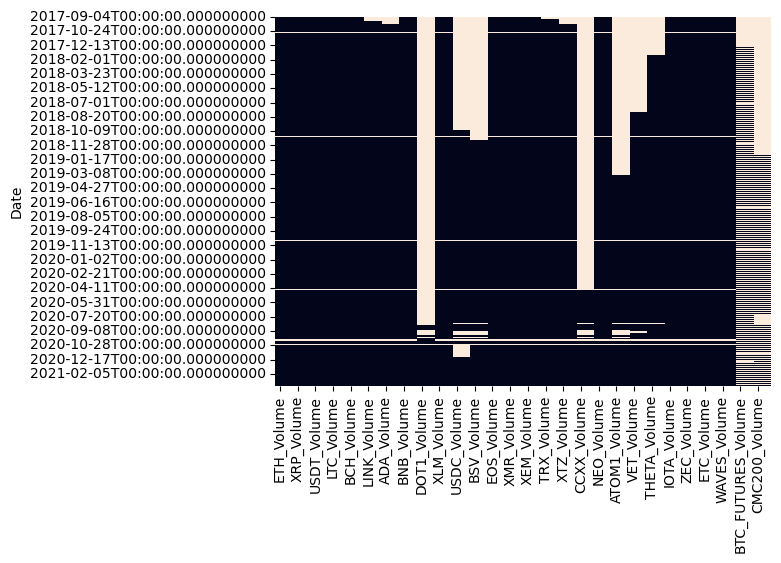

In [32]:
check_missing_values(crypto)

In [33]:
# Impute missing values
crypto = impute_missing_values(crypto, method="fillna_ffill")
# Drop the columns having one or more missing values
crypto = crypto.dropna(axis=1)
# Drop all 0 columns
crypto = drop_zero_cols(crypto)

The number of -np.inf 0
The number of np.inf 0
Before imputation:  11122
After imputation:  9108


### Plot all variables

<AxesSubplot:xlabel='Date'>

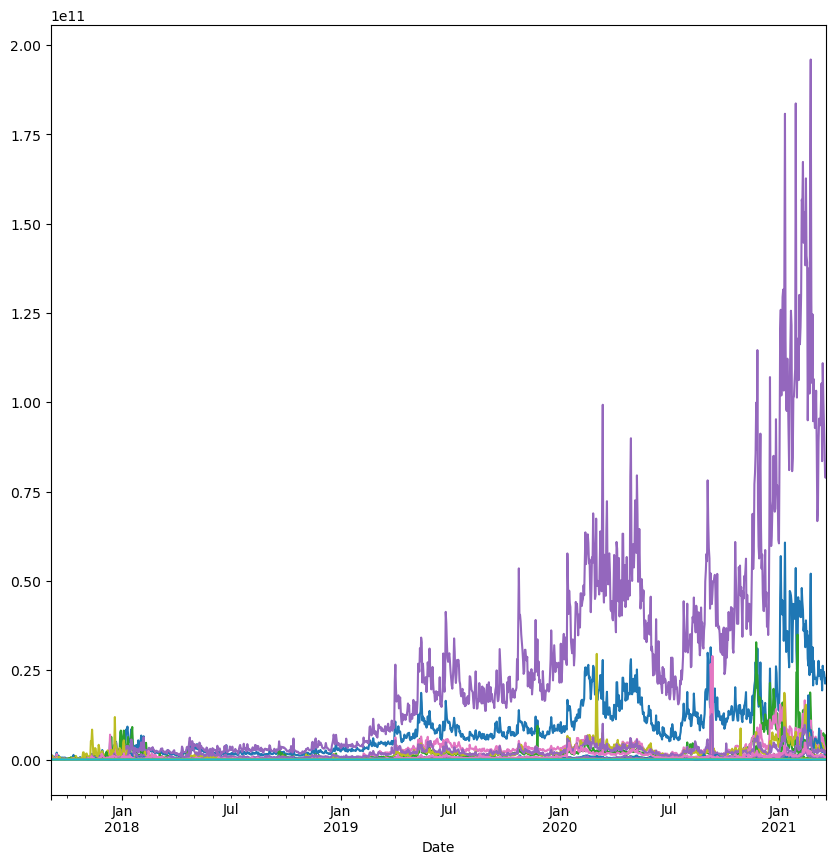

In [34]:
crypto.plot(legend=False, figsize=(10,10))

### Features Selection and Engineering


In [35]:
crypto.columns

Index(['ETH_Volume', 'ETH_Price', 'XRP_Volume', 'XRP_Price', 'USDT_Volume',
       'USDT_Price', 'LTC_Volume', 'LTC_Price', 'BCH_Volume', 'BCH_Price',
       'BNB_Volume', 'BNB_Price', 'XLM_Volume', 'XLM_Price', 'EOS_Volume',
       'EOS_Price', 'XMR_Volume', 'XMR_Price', 'XEM_Volume', 'XEM_Price',
       'NEO_Volume', 'NEO_Price', 'IOTA_Volume', 'IOTA_Price', 'ZEC_Volume',
       'ZEC_Price', 'ETC_Volume', 'ETC_Price', 'WAVES_Volume', 'WAVES_Price'],
      dtype='object')

#### Take Log Return

In [36]:
# Create a function to take log or log return of variables
def take_log_return_crypto(crypto, drop_original=True):
    """
    Take log of cryptoeconomic variables.
    If drop_original=True, original time series will be dropped from the output dataframe.

    Params:
        crypto: pd.DataFrame
        drop_original: boolean
    
    Return:
        crypto_preprocessed: pd.DataFrame (Variables were taken log or log return of)
    """
    

    # crypto_Volume
    crypto_volume_LogReturn = take_log_return(crypto.filter(like="Volume"), drop_original=False)  
    # crypto_Price
    crypto_prices_LogReturn = take_log_return(crypto.filter(like="Price"), drop_original=False)
    # Merge the above
    crypto_preprocessed = pd.merge(crypto_volume_LogReturn, crypto_prices_LogReturn, left_index=True, right_index=True)
    
    return crypto_preprocessed

# Execute the above function
crypto_preprocessed = take_log_return_crypto(crypto)

#### Treat Missing Values

In [37]:
# Revisit dropping missing values
# Impute missing values
crypto_preprocessed = impute_missing_values(crypto_preprocessed, method="fillna_ffill")

The number of -np.inf 0
The number of np.inf 0
Before imputation:  30
After imputation:  0


In [38]:
check_data(crypto_preprocessed)

(1293, 60)
                ETH_Volume     XRP_Volume    USDT_Volume     LTC_Volume  \
Date                                                                      
2017-09-05 1058830016.0000 163296992.0000 192688992.0000 830718016.0000   
2017-09-06  718624000.0000 103080000.0000 166452992.0000 526828992.0000   
2017-09-07 1098780032.0000 151328992.0000 319590016.0000 930673024.0000   

                BCH_Volume    BNB_Volume   XLM_Volume    EOS_Volume  \
Date                                                                  
2017-09-05  693240000.0000 14279400.0000 4741770.0000 26208300.0000   
2017-09-06 1082380032.0000 15442300.0000 3784650.0000 22912100.0000   
2017-09-07  809763008.0000  9872850.0000 5110680.0000 18650200.0000   

               XMR_Volume   XEM_Volume  ...  BNB_Price_LogReturn  \
Date                                    ...                        
2017-09-05  64604400.0000 4629700.0000  ...               0.0554   
2017-09-06  62655700.0000 4079350.0000  ...          

# Store the preprocessed dataset

In [39]:
# Store the separated datasets to each pickle file
dv_preprocessed[: "2021-02-28"].to_pickle(path+"/02_intermediate/dv.pickle")
blockchain_preprocessed[: "2021-02-28"].to_pickle(path+"/02_intermediate/blockchain.pickle")
macro_preprocessed[: "2021-02-28"].to_pickle(path+"/02_intermediate/macro.pickle")
crypto_preprocessed[: "2021-02-28"].to_pickle(path+"/02_intermediate/crypto.pickle")

# Store the preprocessed dataset to mastertable

In [40]:
# Read the preprocessed tables again
dv_preprocessed = pd.read_pickle(path+"/02_intermediate/dv.pickle")
blockchain_preprocessed = pd.read_pickle(path+"/02_intermediate/blockchain.pickle")
macro_preprocessed = pd.read_pickle(path+"/02_intermediate/macro.pickle")
crypto_preprocessed = pd.read_pickle(path+"/02_intermediate/crypto.pickle")

In [41]:
mastertable = dv_preprocessed[["BTC_Price_LogReturn_binary", "BTC_Price_LogReturn", "BTC_Price"]]

def create_mastertable(mastertable, blockchain=False, crypto_Volume=False, crypto_Price=False, 
                       macro_Volume=False, macro_Price=False):
    
    if blockchain==True:
        mastertable = pd.concat([mastertable, blockchain_preprocessed.filter(like="_LogReturn")], axis=1).drop(["total-bitcoins_LogReturn", "blocks-size_LogReturn", "n-transactions-total_LogReturn"], axis=1)
    if macro_Volume==True: 
        mastertable = pd.concat([mastertable, macro_preprocessed.filter(like="Volume_LogReturn")], axis=1)
    if macro_Price==True:
        mastertable = pd.concat([mastertable, macro_preprocessed.filter(like="Price_LogReturn")], axis=1)
    if crypto_Volume==True:
        mastertable = pd.concat([mastertable, crypto_preprocessed.filter(like="Volume_LogReturn")], axis=1)
    if crypto_Price==True:
        mastertable = pd.concat([mastertable, crypto_preprocessed.filter(like="Price_LogReturn")], axis=1)

    mastertable = mastertable.dropna()
    return mastertable

In [42]:
# variable set1: dv
btc = create_mastertable(mastertable)[1:]

# variable set2: dv, blockchain
blockchain = create_mastertable(mastertable, blockchain=True)

# variable set3: dv, blockchain, crypto
blockchain_altcoin = create_mastertable(mastertable, blockchain=True, crypto_Price=True, crypto_Volume=True)

# variable set4: dv, blockchain, macro
blockchain_macro = create_mastertable(mastertable, blockchain=True, macro_Price=True, macro_Volume=True)

# variable set5: dv, blockchain, crypto, macro
blockchain_altcoin_macro = create_mastertable(mastertable, blockchain=True, crypto_Price=True, crypto_Volume=True, macro_Price=True, macro_Volume=True)

In [43]:
# Store the mastetable used for forecasting
btc.to_pickle(path+"/03_primary/btc.pickle")
blockchain.to_pickle(path+"/03_primary/blockchain.pickle")
blockchain_macro.to_pickle(path+"/03_primary/blockchain_macro.pickle")
blockchain_altcoin_macro.to_pickle(path+"/03_primary/blockchain_altcoin_macro.pickle")

In [44]:
blockchain_altcoin_macro.columns

Index(['BTC_Price_LogReturn_binary', 'BTC_Price_LogReturn', 'BTC_Price',
       'market-cap_LogReturn', 'trade-volume_LogReturn',
       'avg-block-size_LogReturn', 'n-transactions-per-block_LogReturn',
       'median-confirmation-time_LogReturn', 'avg-confirmation-time_LogReturn',
       'hash-rate_LogReturn', 'difficulty_LogReturn',
       'miners-revenue_LogReturn', 'transaction-fees_LogReturn',
       'cost-per-transaction_LogReturn', 'n-unique-addresses_LogReturn',
       'n-transactions_LogReturn', 'transactions-per-second_LogReturn',
       'output-volume_LogReturn', 'mempool-count_LogReturn',
       'mempool-growth_LogReturn', 'mempool-size_LogReturn',
       'utxo-count_LogReturn', 'n-transactions-excluding-popular_LogReturn',
       'estimated-transaction-volume_LogReturn', 'mvrv_LogReturn',
       'nvts_LogReturn', 'total-bitcoins_diff_LogReturn',
       'blocks-size_diff_LogReturn', 'n-transactions-total_diff_LogReturn',
       'sp500_Volume_LogReturn', 'eurostoxx_Volume_Lo